In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
# Gerar dados de treinamento
x_train = np.linspace(-1, 1, 1000)
y_train = x_train ** 2

# Adicionar algum ruído aos dados
np.random.seed(0)
noise = np.random.normal(0, 0.02, x_train.shape)
y_train = y_train + noise


In [ ]:
# Construindo o modelo MLP
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(1,), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

model.summary()



# Compilando o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Definindo o EarlyStopping


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 10)                20        
                                                                 
 dense_55 (Dense)            (None, 10)                110       
                                                                 
 dense_56 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141 (564.00 Byte)
Trainable params: 141 (564.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Treinando o modelo com EarlyStopping
history = model.fit(x_train, y_train, validation_split=0.2, epochs=100, verbose=1)


Epoch 1/100
25/25 [==============================] - 1s 7ms/step - loss: 0.0853 - val_loss: 0.0225
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0525 - val_loss: 0.0523
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0366 - val_loss: 0.0767
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0278 - val_loss: 0.0928
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0219 - val_loss: 0.0846
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0174 - val_loss: 0.0754
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0138 - val_loss: 0.0727
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0107 - val_loss: 0.0633
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0083 - val_loss: 0.0550
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0067 - val_loss: 0.0494
Epoch 11/

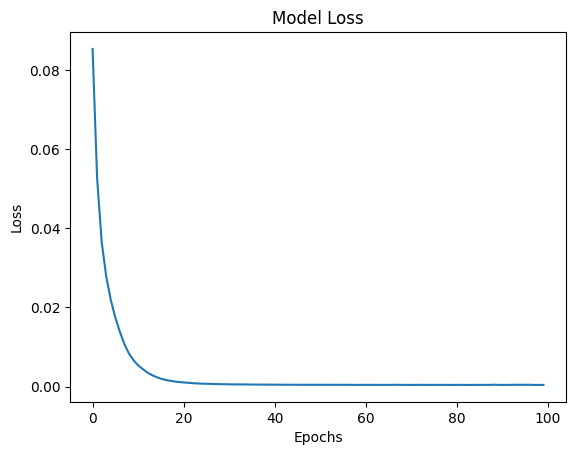

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [ ]:
x_test = np.array([2.0, 3.0, 4.0])
predictions = model.predict(x_test)
print(predictions)


1/1 [==============================] - 0s 66ms/step
[[1.6237375]
 [2.4103584]
 [3.1969798]]


32/32 [==============================] - 0s 1ms/step


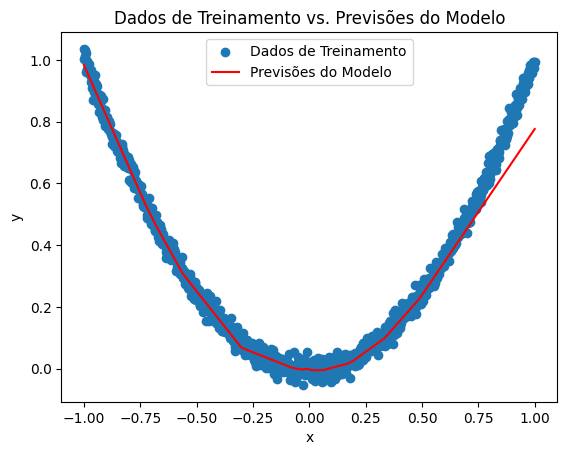

In [ ]:
# Obter previsões do modelo para os dados de treinamento
y_pred = model.predict(x_train)

# Plotar dados de treinamento vs. previsões
plt.scatter(x_train, y_train, label='Dados de Treinamento')
plt.plot(x_train, y_pred, color='red', label='Previsões do Modelo')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dados de Treinamento vs. Previsões do Modelo')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score

# Calculate metrics
mse = mean_squared_error(y_train, y_pred)
r_squared = r2_score(y_train, y_pred)

# Display metrics
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r_squared)

# Discretize the predictions (e.g., rounding to the nearest integer)
y_pred_class = np.round(y_pred)

# Convert the continuous targets to binary (e.g., if greater than 0.5, classify as 1, else as 0)
y_train_binary = np.where(y_train > 0.5, 1, 0)

# Calculate accuracy and F1-score
accuracy = accuracy_score(y_train_binary, y_pred_class)
f1 = f1_score(y_train_binary, y_pred_class)

# Display accuracy and F1-score
print("Accuracy:", accuracy)
print("F1-Score:", f1)



Mean Squared Error (MSE): 0.0029887639265994254
Coefficient of Determination (R^2): 0.9670795027706226
Accuracy: 0.981
F1-Score: 0.9664902998236331
